## Step 1 - Preparing Data 


##### Step Info!

  - Pada Step Ini Adalah Penyiapan Data Untuk Disimpan Dalam Bentuk Cell (Array)
  - Hal Ini Dilakukan Untuk Mempermudah Pengolahan Data Pada Step Selanjutnya

In [59]:
""" Importing Lib Yang Dibutuhkan """

import numpy as np
import skimage as skimage
import collections

from matplotlib import pyplot as plt
from skimage import transform, color, exposure
from skimage.io import imsave, imread, imshow
from keras.utils import to_categorical


##### Step Info!

  - Menyiapkan Target Dari Target Data (Y Data)
  - **ActionFor5000Data.npy** berada pada folder initial data, file ini memiliki struktur array 1 dimensi yang merepresentasikan tiap target dari file citra awal yang ada pada folder **logs_bird**
  - Contoh DataTarget = [0,1,0,0] yang kemudian di proses dengan **One_Hot_Encoding** untuk menghasilkan DataOneHot = [[1,0],[0,1],[1,0],[1,0]]

In [7]:
""" Encoding Dan Simpan File Untuk Action One Hot Baru """

action = np.load("../initial_data/ActionFor5000Data.npy")
actonehot = to_categorical(action)
np.save("../initial_data/DataY",np.array(actonehot))

print('Original label:\n', action[5:9])
print('After conversion to one-hot:\n', actonehot[5:9])

""" Akhir Konversi """


Original label:
 [0 1 1 0]
After conversion to one-hot:
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


' Akhir Konversi '

##### Step Info!

  - Membuat Template Staking Dari Gambar Sample Pada Folder
  - Mengapa saya harus menumpuk 4 frame bersamaan? Ini adalah salah satu cara bagi model untuk dapat menyimpulkan informasi posisi burung.

In [90]:
# Skimage
""" Get Sample For Staking """

samplefile = "../images/frame0.png";
x_t = imread(samplefile)
x_t = skimage.color.rgb2gray(x_t)
x_t = skimage.transform.resize(x_t,(80,80))
x_t = skimage.exposure.rescale_intensity(x_t,out_range=(0,255))
x_t = x_t / 255.0
s_t = np.stack((x_t, x_t, x_t, x_t), axis=2)
s_t = s_t.reshape(1, s_t.shape[0], s_t.shape[1], s_t.shape[2])  #1*80*80*4

print('Size Before Staking:\n', x_t.shape)
print('Size After  Staking :\n', s_t.shape)

""" End For Sample Staking """

Size Before Staking:
 (80, 80)
Size After  Staking :
 (80, 80, 4)


' End For Sample Staking '

##### Step Info!

  - Pertama-tama mengubah gambar warna menjadi skala abu-abu
  - Memotong ukuran gambar menjadi 80x80 piksel
  - Menumpuk 4 frame bersama sebelum diproses pada CNN

In [25]:
""" Preparing Data """

DataX = []
for i in range(5000):
    foldername = "../logs_bird/";
    filename = foldername+"frame"+str(i)+".png"
    img = imread(filename)
    x_t1 = skimage.color.rgb2gray(img)
    x_t1 = skimage.transform.resize(x_t1,(80,80))
    x_t1 = skimage.exposure.rescale_intensity(x_t1, out_range=(0, 255))
    x_t1 = x_t1 / 255.0
    x_t1 = x_t1.reshape(1, x_t1.shape[0], x_t1.shape[1], 1) #1x80x80x1
    s_t1 = np.append(x_t1, s_t[:, :, :, :3], axis=3)
    
    DataX.append(s_t1)
np.save("../initial_data/DataX",np.array(DataX))


""" End For Preparing Data """

' End For Preparing Data '

In [11]:
DataY = np.load("../initial_data/ActionFor5000Data.npy")
DataY.shape
collections.Counter(DataY)

Counter({0: 4653, 1: 347})

##### Prosess Info!

  - Pertama-tama mengubah gambar warna menjadi skala abu-abu
  - Memotong ukuran gambar menjadi 80x80 piksel
  - Menumpuk 4 frame bersama sebelum diproses pada CNN

(288, 512, 3)


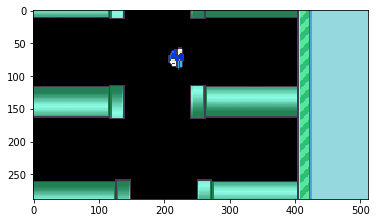

In [104]:
""" Mencoba Dengan Data Sample Terhakir """
filename = "../images/frame1.png"
img = imread(filename)
print("Ukuran : ", img.shape)
plt.imshow(img)
plt.show()


(80, 80)


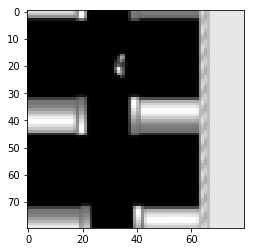

In [105]:
""" Mengubah gambar warna menjadi skala abu-abu Dan Resizing jadi 80x80"""
x_t1 = skimage.color.rgb2gray(img)
x_t1 = skimage.transform.resize(x_t1,(80,80))
print("Ukuran : ", x_t1.shape)
plt.imshow(x_t1, cmap='gray')
plt.show()

(80, 80)


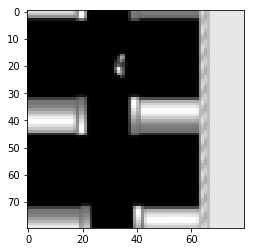

In [106]:
x_t1 = skimage.exposure.rescale_intensity(x_t1,out_range=(0,255))
plt.imshow(x_t1, cmap='gray')
print("Ukuran : ", x_t1.shape)
plt.show()

Before Staking: (80, 80, 1)
After Staking: (80, 80, 4)


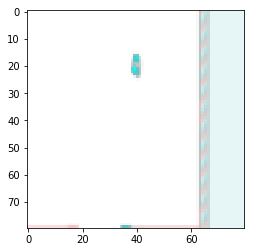

In [107]:
""" Proses Staking 4 Frame """
x_t1 = x_t1 / 255.0
x_t1 = x_t1.reshape(x_t1.shape[0], x_t1.shape[1], 1) #1x80x80x1
s_t1 = np.append(x_t1, s_t[:, :, :3], axis=2)

print("Before Staking:", x_t1.shape)
print("After Staking:", s_t1.shape)
plt.imshow(s_t1, cmap='gray')
plt.show()
